# Implementing Copula Trading Strategy, 1
## Proposed by Liew and Wu
Pairs trading: A copula approach

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copula_strategy
from sklearn import preprocessing

In [2]:
plt.style.use('ggplot')

pair_prices = pd.read_csv(r'BKD_ESC_2009_2011.csv')
CS = copula_strategy.Copula_Strategy()

In [3]:
BKD_series = pair_prices['BKD'].to_numpy()
ESC_series = pair_prices['ESC'].to_numpy()
dates = pair_prices['Date'].to_numpy()

min_max_scaler = preprocessing.MinMaxScaler()

BKD_scaled = min_max_scaler.fit_transform(BKD_series.reshape(-1,1))
ESC_scaled = min_max_scaler.fit_transform(ESC_series.reshape(-1,1))

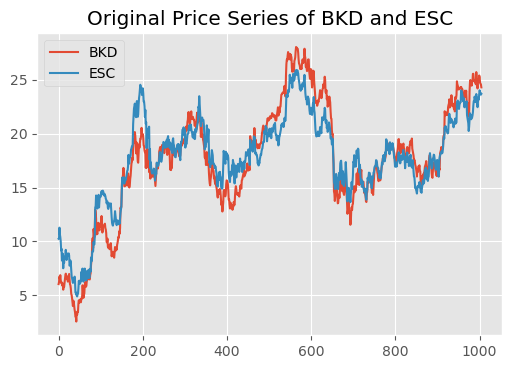

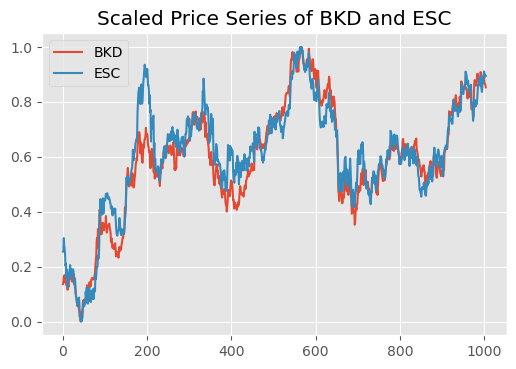

In [4]:
# Plotting scaled prices and original prices
plt.figure(dpi=100)
plt.plot(BKD_series, label='BKD')
plt.plot(ESC_series, label='ESC')
plt.legend()
plt.title(r'Original Price Series of BKD and ESC')
plt.show()

plt.style.use('ggplot')
plt.figure(dpi=100)
plt.plot(BKD_scaled, label='BKD')
plt.plot(ESC_scaled, label='ESC')
plt.legend()
plt.title(r'Scaled Price Series of BKD and ESC')
plt.show()

In [5]:
# Training and testing split
training_length = 670
BKD_train = BKD_scaled[ : training_length].flatten()
ESC_train = ESC_scaled[ : training_length].flatten()

BKD_test = BKD_scaled[training_length : ].flatten()
ESC_test = ESC_scaled[training_length : ].flatten()

In [6]:
# Fit copula
data_train = np.hstack((BKD_train.reshape(-1,1), ESC_train.reshape(-1,1)))
fit_result, copula, cdf1, cdf2 = CS.fit_copula(data=data_train,
                                               copula_name='Gumbel')

In [7]:
# Test copula
position_series = CS.analyse_price_series(BKD_test, ESC_test, cdf1, cdf2,
                                          upper_threshold=0.85,
                                          lower_threshold=0.15)  # Author used 0.95 and 0.05
prob_series = CS.series_condi_prob(BKD_test, ESC_test, cdf1, cdf2)

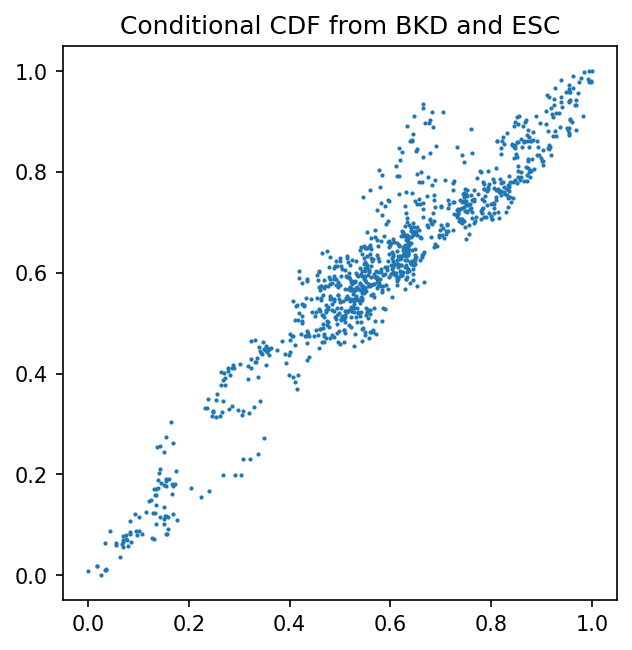

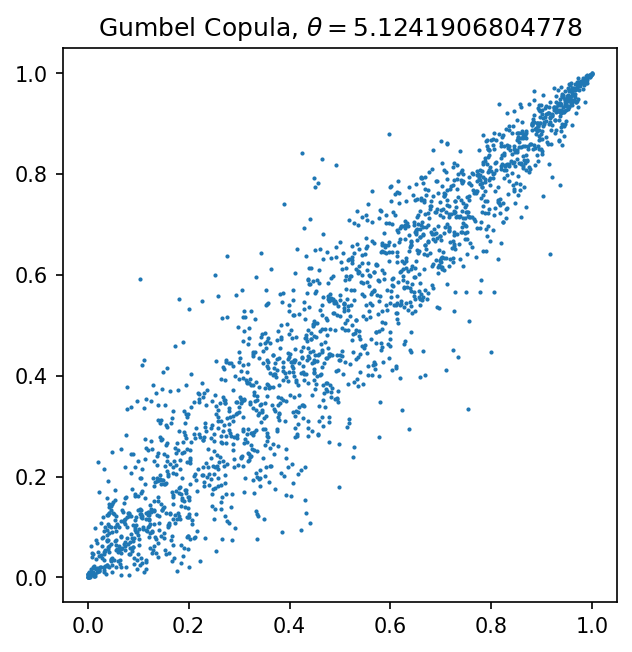

In [8]:
# Plot conditional probability
plt.style.use('default')
plt.figure(dpi=150)
plt.scatter(BKD_scaled, ESC_scaled, s=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'Conditional CDF from BKD and ESC')
plt.show()

# Plot fitted copula
CS.graph_copula(copula_name='Gumbel', theta=copula.theta, dpi=150)

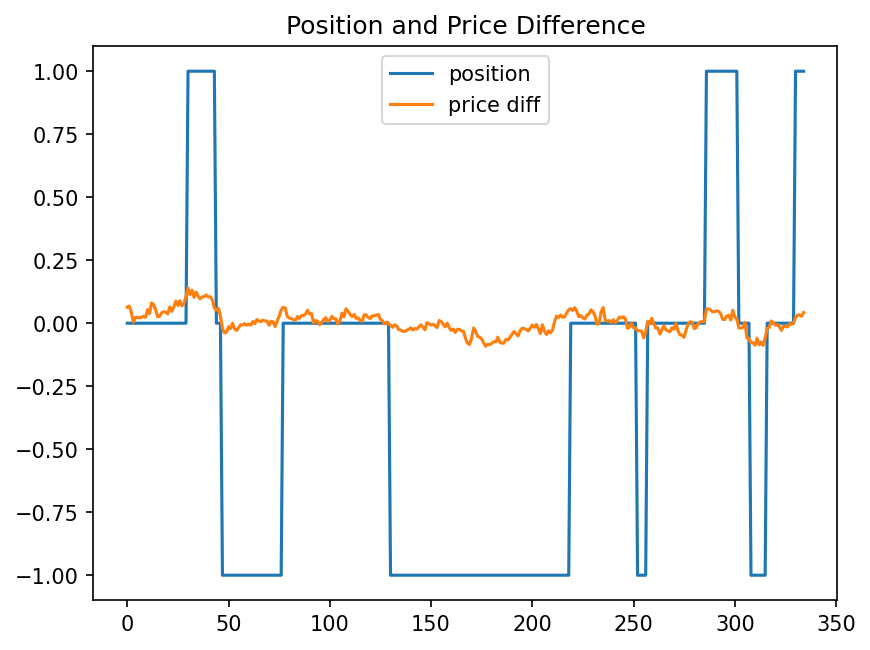

In [9]:
# Plot positions with pairs spread
diff = (-BKD_test + ESC_test)*1
plt.figure(dpi=150)
plt.plot(position_series, label='position')
plt.plot(diff , label='price diff')
plt.legend()
plt.title(r'Position and Price Difference')
plt.show()